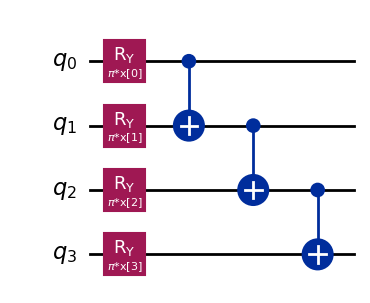

In [1]:
# importing the AngleEncoder from the ansatz_library provided by ionqvision
from ionqvision.ansatze.ansatz_library import AngleEncoder

# creating an instance of AngleEncoder for 4 qubits
encoder = AngleEncoder(num_qubits=4)

# drawing the encoder structure using matplotlib
encoder.draw("mpl")

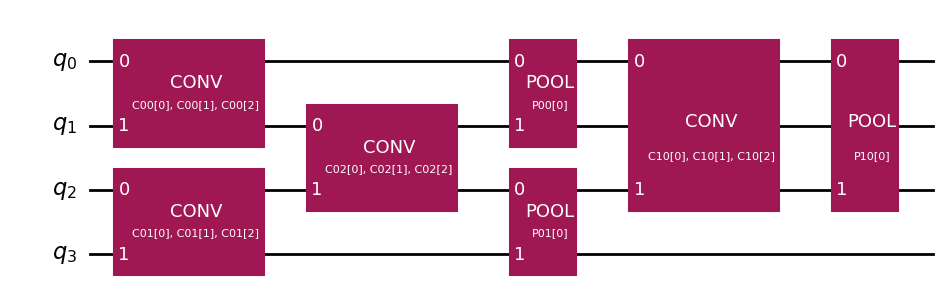

In [2]:
# importing the QCNNAnsatz from the ansatz_library provided by ionqvision
from ionqvision.ansatze.ansatz_library import QCNNAnsatz

# creating an instance of QCNNAnsatz for 4 qubits
ansatz = QCNNAnsatz(num_qubits=4)

# drawing the structure of the QCNN Ansatz using matplotlib
ansatz.draw("mpl")


In [3]:
# importing SparsePauliOp from Qiskit's quantum_info module for working with Pauli operators
from qiskit.quantum_info import SparsePauliOp

# defining a list of quantum features to measure the expectation values of specific Pauli operators
quantum_features = [
    SparsePauliOp(["IIIX"]),  # Pauli X operator applied to the 0th qubit, identity on the others
    SparsePauliOp(["IIIY"]),  # Pauli Y operator applied to the 0th qubit, identity on the others
    SparsePauliOp(["IIIZ"])   # Pauli Z operator applied to the 0th qubit, identity on the others
]


INFO:qiskit.passmanager.base_tasks:Pass: ContainsInstruction - 0.01335 (ms)
INFO:qiskit.passmanager.base_tasks:Pass: UnitarySynthesis - 0.01001 (ms)
INFO:qiskit.passmanager.base_tasks:Pass: HighLevelSynthesis - 0.04005 (ms)
INFO:qiskit.passmanager.base_tasks:Pass: BasisTranslator - 0.05603 (ms)
INFO:qiskit.passmanager.base_tasks:Pass: ElidePermutations - 0.01144 (ms)
INFO:qiskit.passmanager.base_tasks:Pass: RemoveDiagonalGatesBeforeMeasure - 0.07677 (ms)
INFO:qiskit.passmanager.base_tasks:Pass: InverseCancellation - 0.13924 (ms)
INFO:qiskit.passmanager.base_tasks:Pass: CommutationAnalysis - 0.28801 (ms)
INFO:qiskit.passmanager.base_tasks:Pass: CommutativeCancellation - 0.19789 (ms)
INFO:qiskit.passmanager.base_tasks:Pass: Collect2qBlocks - 0.07081 (ms)
INFO:qiskit.passmanager.base_tasks:Pass: ConsolidateBlocks - 0.46754 (ms)
INFO:qiskit.passmanager.base_tasks:Pass: Split2QUnitaries - 0.05054 (ms)
INFO:qiskit.passmanager.base_tasks:Pass: UnitarySynthesis - 0.01025 (ms)
INFO:qiskit.passm

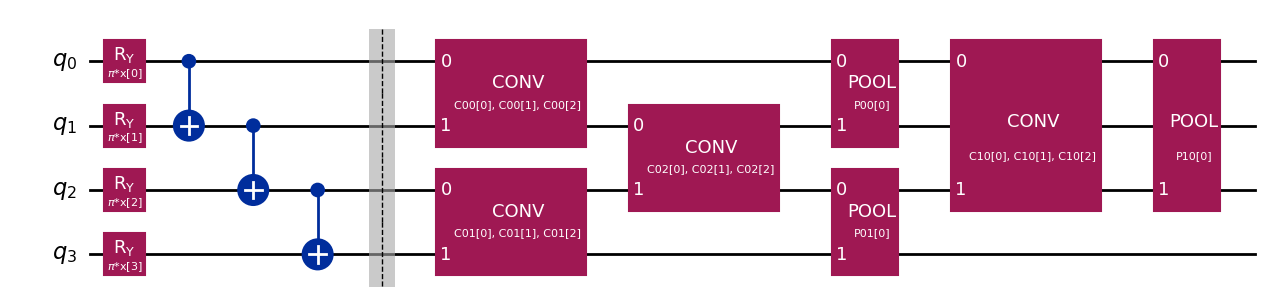

In [4]:
# importing the BinaryMNISTClassifier from the ionqvision.modules package
from ionqvision.modules import BinaryMNISTClassifier

# setting up the classifier for binary classification on the MNIST dataset
# this classifier integrates the encoder, quantum ansatz, and quantum features
# it combines both quantum and classical neural network layers for effective learning
classifier = BinaryMNISTClassifier(encoder, ansatz, quantum_features); classifier

import logging
# configuring the logger to suppress unnecessary log messages
# this helps keep the output clean and focused on important training information
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)

# visualizing the quantum layer of the classifier to understand its structure
classifier.quantum_layer.layer_qc.draw("mpl")


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 31089385.78it/s]


Extracting ./mnist-train/MNIST/raw/train-images-idx3-ubyte.gz to ./mnist-train/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1253201.33it/s]


Extracting ./mnist-train/MNIST/raw/train-labels-idx1-ubyte.gz to ./mnist-train/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 7966405.34it/s]


Extracting ./mnist-train/MNIST/raw/t10k-images-idx3-ubyte.gz to ./mnist-train/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 3367602.75it/s]


Extracting ./mnist-train/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./mnist-train/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 32500855.01it/s]


Extracting ./mnist-test/MNIST/raw/train-images-idx3-ubyte.gz to ./mnist-test/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1214880.09it/s]


Extracting ./mnist-test/MNIST/raw/train-labels-idx1-ubyte.gz to ./mnist-test/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 7908937.60it/s]


Extracting ./mnist-test/MNIST/raw/t10k-images-idx3-ubyte.gz to ./mnist-test/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 3716451.18it/s]

Extracting ./mnist-test/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./mnist-test/MNIST/raw



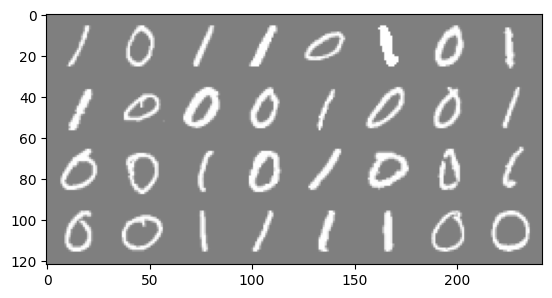

In [5]:
# Verify the images loaded correctly
classifier.visualize_batch()

In [ ]:
%%time
# Get a (pre-processed) training and test set
# in this case, we are using 300 images for training and 100 for testing
train_set, test_set = classifier.get_train_test_set(train_size=300, test_size=100)

# configure model training hyperparameters
config = {
    "epochs": 10,  # number of passes through the entire training dataset; increased epochs can help the model learn complex patterns
    "lr": 0.01,    # learning rate for the Adam optimizer; controls how much to adjust weights with respect to the loss gradient
    "batch_size": 55,  # number of images in each training batch; larger batch sizes may speed up training but can decrease accuracy
    "betas": (0.9, 0.99),  # parameters for controlling momentum and smoothing in the optimizer
    "weight_decay": 1e-3,  # regularization parameter to prevent overfitting by adding a penalty for large weights
    "clip_grad": True,     # enable gradient clipping to prevent exploding gradients during training
    "log_interval": 6,     # interval for logging training progress; helps track the model's performance over time
}

# train the model and plot the training results
classifier.train_module(train_set, test_set, config)
classifier.plot_training_progress()
